In [1]:
#imports
import pandas as pd
import os
from dotenv import load_dotenv
from utils.helpers import *

# Load environment variables
load_dotenv()

# Read CSV file
df = pd.read_csv(os.environ['TRAIN_LOCATION'])
# df = df.drop(columns=['id'])

# View result
df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [2]:
#Check for missing and duplicates
print(df.duplicated().sum()) # no duplicates
df.isna().sum() #We have alot of missing data that we will deal with in different ways

0


id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [3]:
from utils.helpers import preprocessing
df = preprocessing(df)
df

,id,gender,age,city,working_student,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,...,sleep_duration,dietary_habits,degree,suicidal_thoughts,workstudy_hours,financial_stress,family_mental_illness,depression,gdp,ppp
0,0,-1.106691,0.695354,ludhiana,0.497318,-1.530823,-0.045696,1.589806,0.033782,0.018012,...,1.344619,1.256959,-0.623329,-0.988778,-1.363130,-0.699692,-0.994302,0,8.70,-0.695280
1,1,0.903594,-1.161941,varanasi,0.497318,0.885603,-0.045696,0.795256,0.033782,0.018012,...,-1.266738,-1.230688,0.486358,1.011350,0.193919,0.007732,-0.994302,1,18.13,-0.379892
2,2,0.903594,-0.596677,visakhapatnam,-2.010786,0.831905,3.194418,0.000706,1.869831,-1.632077,...,-0.483331,1.256959,-1.067204,1.011350,-0.844114,-1.407117,-0.994302,1,21.07,-0.222198
3,3,0.903594,-1.484949,mumbai,0.497318,0.885603,-0.045696,1.589806,0.033782,0.018012,...,-1.266738,0.013135,-0.808277,1.011350,0.972444,-1.407117,1.005730,1,162.44,3.424474
4,4,-1.106691,-0.838933,kanpur,0.497318,-1.584521,-0.045696,-1.588395,0.033782,0.018012,...,-0.483331,-1.230688,-0.808277,1.011350,0.712936,0.715157,1.005730,0,8.19,-0.724847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140707,140695,-1.106691,-1.807957,ahmedabad,0.497318,1.046698,-0.045696,1.589806,0.033782,0.018012,...,-0.483331,-1.230688,-0.179454,-0.988778,-1.103622,0.715157,1.005730,1,64.85,0.970362
140708,140696,-1.106691,0.049338,hyderabad,0.497318,-1.262331,-0.045696,1.589806,0.033782,0.018012,...,0.561212,0.013135,-0.956235,1.011350,-0.065589,1.422581,1.005730,0,80.06,1.946093
140709,140697,-1.106691,-1.323445,kolkata,0.497318,-0.027269,-0.045696,0.000706,0.033782,0.018012,...,1.344619,0.013135,-1.141183,-0.988778,-0.584605,0.715157,-0.994302,0,75.21,1.364597
140710,140698,-1.106691,0.695354,srinagar,0.497318,0.456016,-0.045696,1.589806,0.033782,0.018012,...,-0.483331,0.013135,1.263139,1.011350,0.972444,-1.407117,-0.994302,0,18.13,-0.379892


In [4]:
# #Now we want to split it into 2 datasets, students and workers
# students_df = df.loc[df["working_student"] == 0].drop({"working_student", "work_pressure", "job_satisfaction"}, axis=1)
# working_df = df.loc[df["working_student"] == 1].drop({"working_student", "study_satisfaction", "cgpa", "academic_pressure"}, axis=1)

# display(students_df)

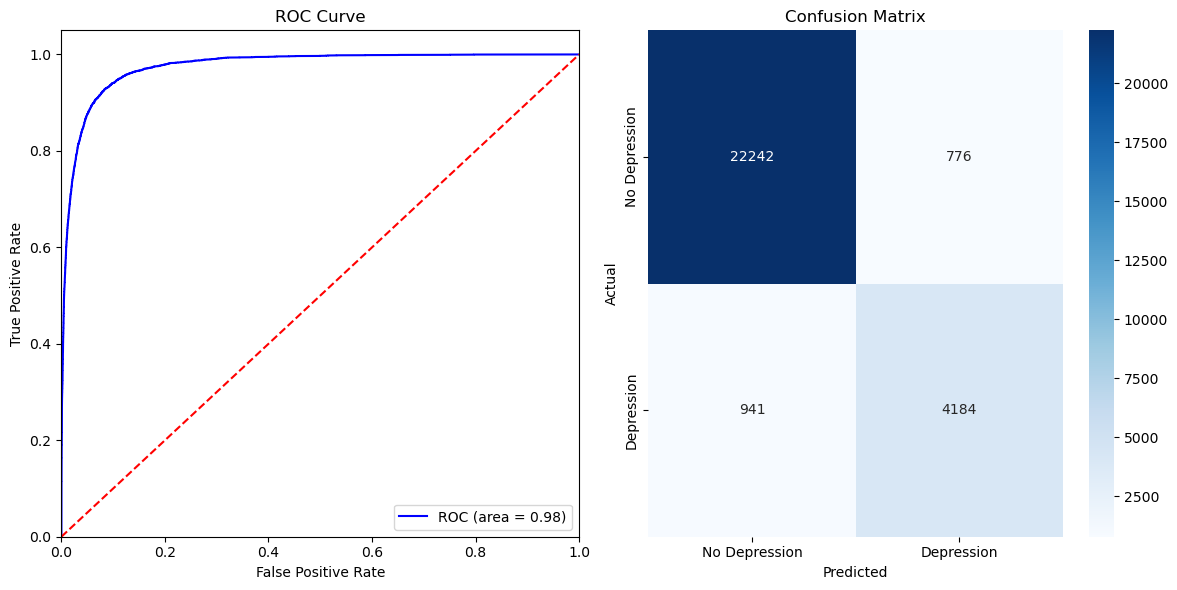

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     23018
           1       0.84      0.82      0.83      5125

    accuracy                           0.94     28143
   macro avg       0.90      0.89      0.90     28143
weighted avg       0.94      0.94      0.94     28143

Model Accuracy: 0.94


In [5]:
from OurModels import LogisticRegressionModel
model = LogisticRegressionModel()
results = model.train(df)
model.report()

In [6]:
newdf = pd.read_csv(os.environ["TEST_LOCATION"])
newdf = preprocessing(newdf)

test = model.predict(newdf)

generate_submission(test, "logreg")
print(test.shape)

Submission saved to: /Users/nikan/Desktop/School/Sems/Spring 2025/COS 322/COS322-depression/data/Results/submissions/submission_logreg_140700.csv
(93800, 2)


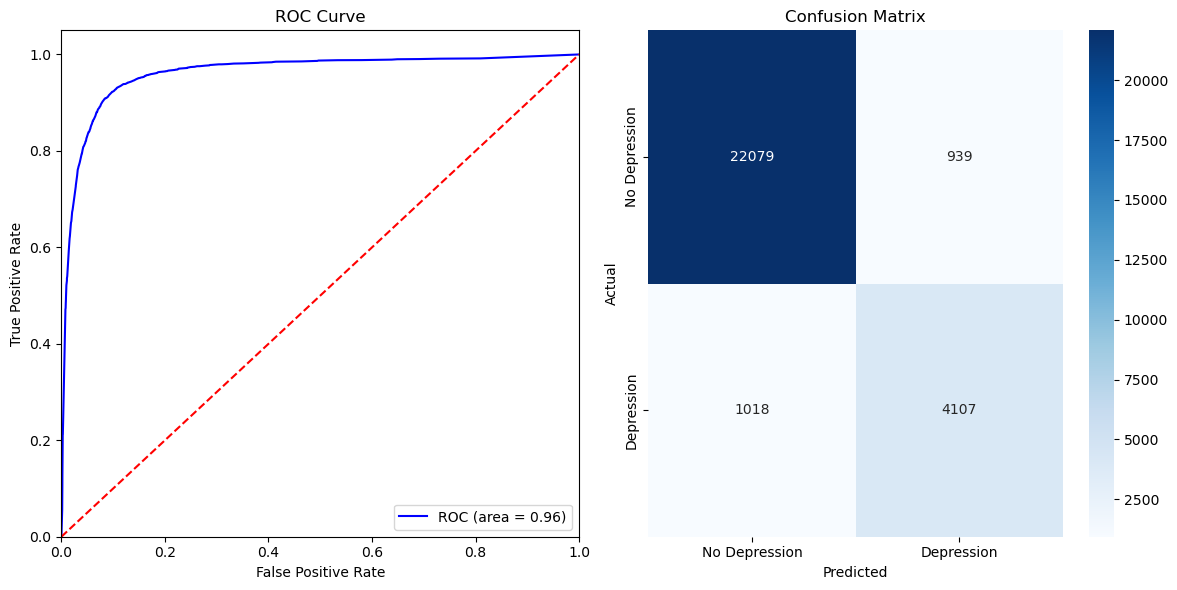

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     23018
           1       0.81      0.80      0.81      5125

    accuracy                           0.93     28143
   macro avg       0.88      0.88      0.88     28143
weighted avg       0.93      0.93      0.93     28143

Model Accuracy: 0.93


In [7]:
from OurModels import DecisionTreeClassifierModel
model = DecisionTreeClassifierModel()
results = model.train(df)
# model.optimize(df)
model.report()

In [8]:
newdf = pd.read_csv(os.environ['TEST_LOCATION'])
newdf = preprocessing(newdf)

test = model.predict(newdf)

generate_submission(test, "treeeeee")
print(test.shape)

Submission saved to: /Users/nikan/Desktop/School/Sems/Spring 2025/COS 322/COS322-depression/data/Results/submissions/submission_treeeeee_140700.csv
(93800, 2)


In [9]:
# print(test.shape)

In [10]:
# from OurModels import XGBoostModel
# model = XGBoostModel()
# results = model.train(df)
# model.report(*results)
# newdf = preprocessing(pd.read_csv(os.environ['TEST_LOCATION']))

# test = model.predict(newdf)

# generate_submission(test, "XBG")